In [38]:
%pip install matplotlib
%pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [39]:
import pandas as pd

df = pd.read_csv('Employee Salaries.csv')  

size = df.shape
print("Size of the dataset:", size)


data_types = df.dtypes
print(data_types)

null_values = df.isnull().sum()
print(null_values)


Size of the dataset: (148654, 11)
Id                int64
EmployeeName     object
JobTitle         object
BasePay          object
OvertimePay      object
OtherPay         object
Benefits         object
Year              int64
Notes           float64
Agency           object
Status           object
dtype: object
Id                   0
EmployeeName         0
JobTitle             0
BasePay            605
OvertimePay          0
OtherPay             0
Benefits         36158
Year                 0
Notes           148654
Agency               0
Status          110535
dtype: int64


C:\Users\thilks\AppData\Local\Temp\ipykernel_27704\1725620745.py:3: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Employee Salaries.csv')


In [40]:
numerical_columns = ['BasePay', 'OvertimePay', 'OtherPay', 'Benefits']  

for col in numerical_columns:
    df[col] = df[col].replace({'\\$': '', ',': ''}, regex=True)
    df[col] = pd.to_numeric(df[col], errors='coerce')  # Handle noise by converting errors to NaN

null_values = df.isnull().sum()


threshold = 0.7 * len(df)
df.dropna(thresh=threshold, axis=1, inplace=True)

df['Year'] = pd.to_datetime(df['Year'], format='%Y')

print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Id            148654 non-null  int64         
 1   EmployeeName  148654 non-null  object        
 2   JobTitle      148654 non-null  object        
 3   BasePay       148026 non-null  float64       
 4   OvertimePay   148623 non-null  float64       
 5   OtherPay      148627 non-null  float64       
 6   Benefits      112454 non-null  float64       
 7   Year          148654 non-null  datetime64[ns]
 8   Agency        148654 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(3)
memory usage: 10.2+ MB
None


In [41]:

# Univariate analysis for each column
for col in df.columns:
    if df[col].dtype in ['int64', 'float64']: 
        print(f"Univariate analysis for column '{col}' (Numerical):")
        print("Summary statistics:")
        print(df[col].describe())
                
    elif df[col].dtype == 'object': 
        print(f"Univariate analysis for column '{col}' (Categorical):")
        print("Value counts:")
        print(df[col].value_counts())

        
    elif df[col].dtype == 'datetime64': 
        print(f"Univariate analysis for column '{col}' (Datetime):")
       
        df[col] = pd.to_datetime(df[col])  
        print("Date range:")
        print(f"From: {df[col].min()} to {df[col].max()}")

      


Univariate analysis for column 'Id' (Numerical):
Summary statistics:
count    148654.000000
mean      74327.500000
std       42912.857795
min           1.000000
25%       37164.250000
50%       74327.500000
75%      111490.750000
max      148654.000000
Name: Id, dtype: float64
Univariate analysis for column 'EmployeeName' (Categorical):
Value counts:
EmployeeName
Kevin Lee                   13
Richard Lee                 11
Steven Lee                  11
William Wong                11
Stanley Lee                  9
                            ..
Jeffrey Skover               1
Ken Dever                    1
Kevin Whitfield              1
Granville McCollough III     1
Joe Lopez                    1
Name: count, Length: 110811, dtype: int64
Univariate analysis for column 'JobTitle' (Categorical):
Value counts:
JobTitle
Transit Operator                                  7036
Special Nurse                                     4389
Registered Nurse                                  3736
Public

C:\Users\thilks\AppData\Local\Temp\ipykernel_27704\1646294976.py:4: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Employee Salaries.csv')


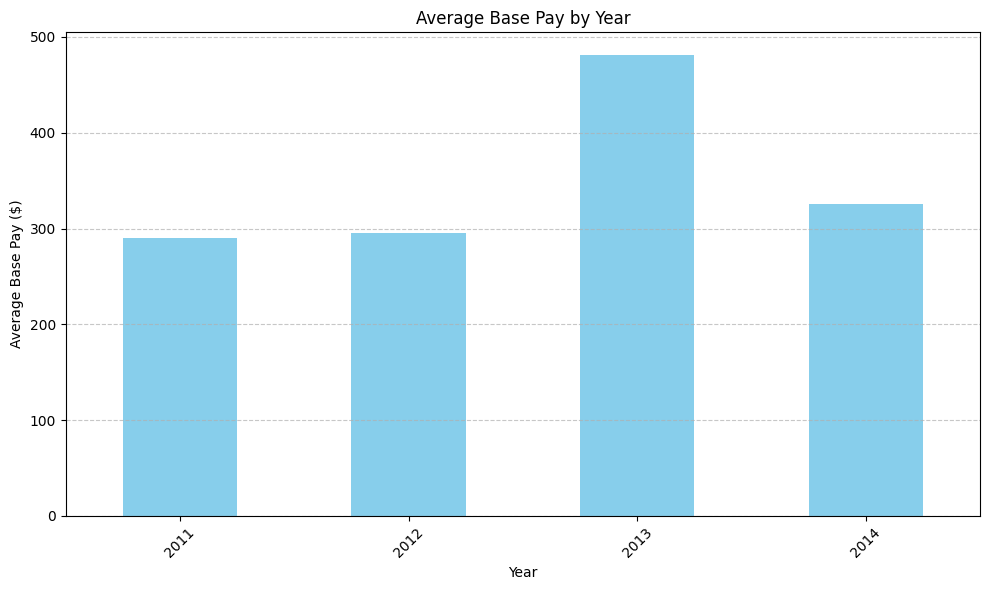

In [42]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('Employee Salaries.csv')

df['BasePay'] = df['BasePay'].replace({'\\$': ''}, regex=True)

df['BasePay'] = pd.to_numeric(df['BasePay'], errors='coerce')

unique_years = df['Year'].unique()

average_base_pay = df.groupby('Year')['BasePay'].mean().round(2)

#BAR CHART
plt.figure(figsize=(10, 6))
average_base_pay.plot(kind='bar', color='skyblue')
plt.title('Average Base Pay by Year')
plt.xlabel('Year')
plt.ylabel('Average Base Pay ($)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [43]:
numerical_columns = ['OvertimePay']
for col in numerical_columns:
    df[col] = df[col].replace({'\\$': '', ',': ''}, regex=True)
    df[col] = pd.to_numeric(df[col], errors='coerce')

def mode_func(x):
    modes = x.mode()
    if len(modes) > 0:
        return modes.iloc[0]
    else:
        return None

overtime_stats = df.groupby('Year')['OvertimePay'].agg(['min', 'max', 'median', mode_func]).round(2)


overtime_stats.columns = ['Minimum', 'Maximum', 'Median', 'Mode']

print("Minimum, Maximum, Median, and Mode Overtime Pay for Each Year:")
print(overtime_stats)


Minimum, Maximum, Median, and Mode Overtime Pay for Each Year:
      Minimum    Maximum  Median  Mode
Year                                  
2011     0.00  245131.88     0.0   0.0
2012     0.00  220909.48     0.0   0.0
2013    -0.01  196689.18     0.0   0.0
2014     0.00  173547.73     0.0   0.0


In [44]:

numerical_columns = ['BasePay', 'OvertimePay', 'OtherPay', 'Benefits']
for col in numerical_columns:
    df[col] = df[col].replace({'\\$': '', ',': ''}, regex=True)
    df[col] = pd.to_numeric(df[col], errors='coerce')

df['Total Pay'] = df['BasePay'].fillna(0) + df['OvertimePay'].fillna(0) + df['OtherPay'].fillna(0) + df['Benefits'].fillna(0)


print(df.head())

   Id       EmployeeName                                        JobTitle  \
0   1     NATHANIEL FORD  GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY   
1   2       GARY JIMENEZ                 CAPTAIN III (POLICE DEPARTMENT)   
2   3     ALBERT PARDINI                 CAPTAIN III (POLICE DEPARTMENT)   
3   4  CHRISTOPHER CHONG            WIRE ROPE CABLE MAINTENANCE MECHANIC   
4   5    PATRICK GARDNER    DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)   

   BasePay  OvertimePay   OtherPay  Benefits  Year  Notes         Agency  \
0      NaN         0.00  400184.25       NaN  2011    NaN  San Francisco   
1      NaN    245131.88  137811.38       NaN  2011    NaN  San Francisco   
2      NaN    106088.18   16452.60       NaN  2011    NaN  San Francisco   
3      NaN     56120.71  198306.90       NaN  2011    NaN  San Francisco   
4      NaN      9737.00  182234.59       NaN  2011    NaN  San Francisco   

  Status  Total Pay  
0    NaN  400184.25  
1    NaN  382943.26  
2    NaN  122540.78 

In [45]:
from scipy.stats import shapiro, norm

import pandas as pd
from scipy.stats import shapiro
from scipy.stats import norm
import numpy as np

df = pd.read_csv('Employee Salaries.csv')

numerical_columns = ['BasePay', 'OvertimePay', 'OtherPay', 'Benefits']
for col in numerical_columns:
    df[col] = df[col].replace({'\\$': '', ',': ''}, regex=True)
    df[col] = pd.to_numeric(df[col], errors='coerce')

df['Total Pay'] = df['BasePay'].fillna(0) + df['OvertimePay'].fillna(0) + df['OtherPay'].fillna(0) + df['Benefits'].fillna(0)


mean_total_pay = df['Total Pay'].mean()
std_total_pay = df['Total Pay'].std()
n = len(df['Total Pay'])
confidence_level = 0.95  # 95% confidence level
z_critical = norm.ppf((1 + confidence_level) / 2)  # Two-tailed Z critical value
margin_of_error = z_critical * (std_total_pay / np.sqrt(n))
lower_bound = mean_total_pay - margin_of_error
upper_bound = mean_total_pay + margin_of_error

print("Confidence Interval for the Mean of Total Pay Column:")
print("Lower Bound:", lower_bound)
print("Upper Bound:", upper_bound)

statistic, p_value = shapiro(df['Total Pay'])

if p_value > 0.05:
    print("Shapiro-Wilk Test Result: Normal Distribution")
else:
    print("Shapiro-Wilk Test Result: Not A Normal Distribution")


C:\Users\thilks\AppData\Local\Temp\ipykernel_27704\476150315.py:8: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Employee Salaries.csv')


Confidence Interval for the Mean of Total Pay Column:
Lower Bound: 93373.18432518149
Upper Bound: 94011.60335210939
Shapiro-Wilk Test Result: Not A Normal Distribution


C:\Users\thilks\AppData\Local\Temp\ipykernel_27704\476150315.py:31: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 148654.
  statistic, p_value = shapiro(df['Total Pay'])


In [46]:
chief_titles_count = df['JobTitle'].str.lower().str.contains('chief', case=False).sum()

print( chief_titles_count)

627


In [47]:
numerical_columns = ['BasePay', 'OvertimePay', 'OtherPay', 'Benefits']
for col in numerical_columns:
    df[col] = df[col].replace({'\\$': '', ',': ''}, regex=True)
    df[col] = pd.to_numeric(df[col], errors='coerce')

df['Total Pay'] = df['BasePay'].fillna(0) + df['OvertimePay'].fillna(0) + df['OtherPay'].fillna(0) + df['Benefits'].fillna(0)

job_title_stats = df.groupby('JobTitle')['Total Pay'].agg(['count', 'max', 'min'])

job_title_stats.columns = ['Number of Employees', 'Maximum Total Pay', 'Minimum Total Pay']

new_df = job_title_stats.reset_index().set_index('JobTitle')

print(new_df)

                                                Number of Employees  \
JobTitle                                                              
ACCOUNT CLERK                                                    83   
ACCOUNTANT                                                        5   
ACCOUNTANT INTERN                                                48   
ACPO,JuvP, Juv Prob (SFERS)                                       1   
ACUPUNCTURIST                                                     1   
...                                                             ...   
X-RAY LABORATORY AIDE                                            26   
X-Ray Laboratory Aide                                           100   
YOUTH COMMISSION ADVISOR, BOARD OF SUPERVISORS                    1   
Youth Comm Advisor                                                4   
ZOO CURATOR                                                       1   

                                                Maximum Total Pay  \
JobTitl

C:\Users\thilks\AppData\Local\Temp\ipykernel_27704\3213599929.py:5: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Employee Salaries.csv')


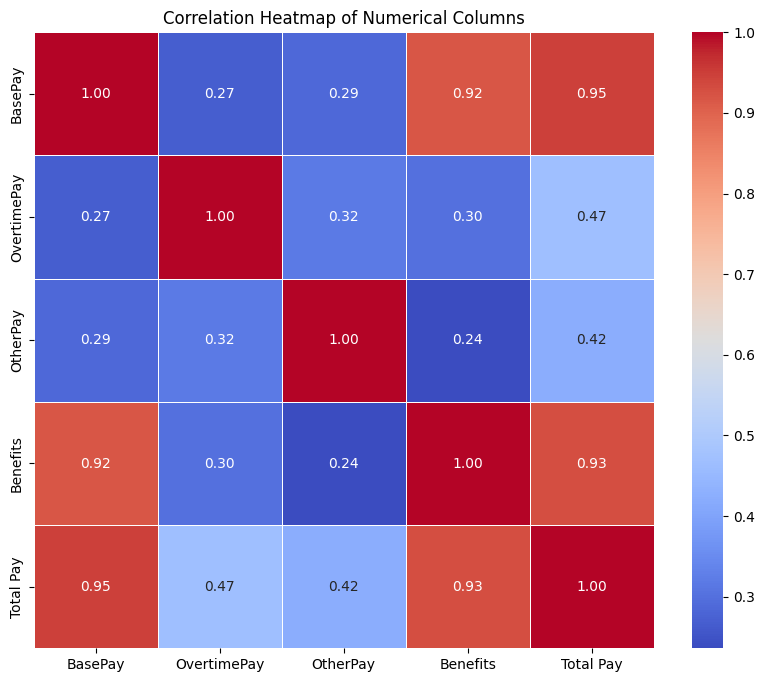

In [48]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('Employee Salaries.csv')

numerical_columns = ['BasePay', 'OvertimePay', 'OtherPay', 'Benefits']
for col in numerical_columns:
    df[col] = df[col].replace({'\\$': '', ',': ''}, regex=True)
    df[col] = pd.to_numeric(df[col], errors='coerce')

df['Total Pay'] = df['BasePay'].fillna(0) + df['OvertimePay'].fillna(0) + df['OtherPay'].fillna(0) + df['Benefits'].fillna(0)

numerical_df = df[numerical_columns + ['Total Pay']]

corr_matrix = numerical_df.corr()

# HEATMAP
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Columns')
plt.show()



In [49]:
numerical_columns = ['BasePay', 'OvertimePay', 'OtherPay', 'Benefits']

for col in numerical_columns:
    df[col] = df[col].replace({'\\$': '', ',': ''}, regex=True)
    df[col] = pd.to_numeric(df[col], errors='coerce')

df['Total Pay'] = df['BasePay'].fillna(0) + df['OvertimePay'].fillna(0) + df['OtherPay'].fillna(0) + df['Benefits'].fillna(0)

top_highest = df.nlargest(5, 'Total Pay')[['JobTitle', 'Total Pay']]

top_lowest = df.nsmallest(5, 'Total Pay')[['JobTitle', 'Total Pay']]

combined_table = pd.concat([top_highest, top_lowest])
print(combined_table)


                                              JobTitle  Total Pay
0       GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY  567595.43
1                      CAPTAIN III (POLICE DEPARTMENT)  538909.28
110531                                  Deputy Chief 3  510732.68
110532                               Asst Med Examiner  479652.21
110533                        Chief Investment Officer  436224.36
148653                      Counselor, Log Cabin Ranch    -618.13
110530                                Police Officer 3     -33.89
110529                                Police Officer 3      -8.20
110528                                Police Officer 3      -2.73
36156       STATIONARY ENGINEER, WATER TREATMENT PLANT       0.00


In [50]:
numerical_columns = ['BasePay', 'OvertimePay', 'OtherPay', 'Benefits']
for col in numerical_columns:
    df[col] = df[col].replace({'\\$': '', ',': ''}, regex=True)
    df[col] = pd.to_numeric(df[col], errors='coerce')

filtered = df[
    (df['JobTitle'] == 'Chief Investment Officer') & 
    (df['BasePay'] > 70000) & 
    (df['OvertimePay'] < 40000) & 
    (df['OtherPay'] > 50000)
]

print(filtered)


            Id          EmployeeName                  JobTitle   BasePay  \
110533  110534  William J Coaker Jr.  Chief Investment Officer  257340.0   

        OvertimePay  OtherPay  Benefits  Year  Notes         Agency Status  \
110533          0.0   82313.7  96570.66  2014    NaN  San Francisco     PT   

        Total Pay  
110533  436224.36  


In [51]:
numerical_columns = ['BasePay', 'OvertimePay', 'OtherPay', 'Benefits']
for col in numerical_columns:
    df[col] = df[col].replace({'\\$': '', ',': ''}, regex=True)
    df[col] = pd.to_numeric(df[col], errors='coerce')

df['Total Pay'] = df['BasePay'].fillna(0) + df['OvertimePay'].fillna(0) + df['OtherPay'].fillna(0) + df['Benefits'].fillna(0)

second_highest_pay_per_job = df.groupby('JobTitle')['Total Pay'].nlargest(2).reset_index(level=1, drop=True)

filtered= df[df['Total Pay'].isin(second_highest_pay_per_job)]

print(filtered)


            Id       EmployeeName  \
0            1     NATHANIEL FORD   
1            2       GARY JIMENEZ   
2            3     ALBERT PARDINI   
3            4  CHRISTOPHER CHONG   
4            5    PATRICK GARDNER   
...        ...                ...   
148648  148649        Leon Walker   
148649  148650      Roy I Tillery   
148650  148651       Not provided   
148651  148652       Not provided   
148652  148653       Not provided   

                                              JobTitle    BasePay  \
0       GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY  167411.18   
1                      CAPTAIN III (POLICE DEPARTMENT)  155966.02   
2                      CAPTAIN III (POLICE DEPARTMENT)  212739.13   
3                 WIRE ROPE CABLE MAINTENANCE MECHANIC   77916.00   
4         DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)  134401.60   
...                                                ...        ...   
148648                                       Custodian       0.00   
148